### Paola Della Foglia matr. 961014

# <span style="color:red"> Esercitazione numerica 6</span>

## <span style="color:blue"> Esercizio 6.1</span>
### Scopo
Lo scopo dell'esercizio è quello di implementare un modello di meccanica statistica: il modello di Ising in 1D, che  altro non è che un'applicazione dell'algoritmo di Metropolis. Tale modello possiede un numero elevato di gradi di libertà e per questo motivo è classificato come sistema complesso. Applicheremo tale modello completando il codice in C++ scaricato dal sito Ariel di NSL (laboratorio di simulazione numerica).

Nella simulazione del modello di Ising in 1D, utilizzeremo gli algoritmi di campionamento di Metropolis e di Gibbs per campionare il peso di Boltzmann $p(\{ s_i \}) = \exp(-\beta H)/Z$,
aggiungendo anche la possibilità di ricominciare da una configurazione di spin precedente.

Il nostro codice finale, dopo le relative modifiche, dovrebbe produrre i seguenti risultati in funzione di $T$ nell'intervallo $\left[0.5;2.0\right]$ con $N=50$ spins fissati e la costante d'interazione tra gli spin $J=1$.

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Abbiamo calcolato le incertezze sulle grandezze termodinamiche tramite il metodo della "media a blocchi" già utilizzato negli esercizi precedenti.

### Compilazione
Il codice è nella cartella <font face = "Courier"> ex06.1 </font>: per compilarlo, occorre digitare da shell unix, il comando <font face = "Courier"> `$make` </font> e per eseguirlo <font face = "Courier"> `$./Monte_Carlo_ISING_1D.exe` </font>. 
Nel file <font face = "Courier"> 'input.dat' </font> sono impostati i valori di temperatura iniziale e finale, gli step per la temperatura, il numero di spin e i valori di $J$ e $h$, per usare l'algoritmo di Metropolis (1) o di Gibbs (0), il numero di blocchi e quanti step in ogni blocco per ogni temperatura, e se la simulazione deve ripartire restart(1) o continue (0). 
Il codice produce 4 files in output, uno per ogni variabile che stiamo calcolando, con valori di $f(T,N)$ in funzione di $T$, con le loro incertezze.

### Energia interna $U(N,T)$
#### (con h=0)
Il modello di Ising in 1D, in meccanica statistica, rappresenta un modello di un sistema magnetico e quindi può essere risolto a partire dall'Hamiltoniana per un sistema di N spin con l'interazione tra quelli più vicini:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
L'Hamiltoniana è scritta in modo che il campo magnetico esterno sia simmetrico rispetto a quello d'interazione. Abbiamo posto ($\mu_B=1$ e $k_B=1$) dove $\{ s_i \}_{i=1,N}$ sono spin variabili che assumono valori $\{-1;1\}$, la costante d'interazione tra gli spin $J>0$ è positiva (modello ferromagnetico quindi compaiono gli spin $s_{i}$ ed $s_{i+1}$), e assumeremo $s_{N+1} = s_{1}$ in quanto lavoriamo in condizioni al contorno periodiche (periodic boundary conditions).
Ciò ci permette di essere più fedeli nella trattazione del limite termodinamico, che serve per studiare il comportamento e l'esistenza di fenomeni come le transizioni di fase. 


Questo modello in una dimensione (1D), è esattamente risolubile anche in presenza di un campo esterno in quanto siamo in grado di calcolare la funzione di partizione:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

dove i due autovalori
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
con $\beta=\frac{1}{k_b T} = \frac{1}{T}$.

Nel nostro caso cosidereremo entrambi gli autovalori $\lambda_{1}$ e $\lambda_{2}$ perchè vogliamo confrontare gli esiti della simulazione/i effettuata per N spin finito con delle formule analitiche, senza fare approssimazioni.
Ricapitolando calcoleremo la funzione di partizione in modo esatto, senza approssimazione di limite termodinamico.

Se $h=0$ avremo:
$$
U(N,T) = \langle H \rangle
=  \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -N J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

Possiamo fare quindi un confronto.

La meccanica statistica partendo dalla funzione di partizione si ricava tutte le grandezze termodinamiche, calcolando inanzitutto l'Energia libera che in questo caso è quella di Helmholtz. $H=-K_{B}T ln (Z)$ , le altre quantità termodinamiche possono essere dedotte derivando e differenziando l'energia libera di Helmholtz.

Come prima cosa, dobbiamo equilibrare il sistema, in modo tale he le variabili termodinamiche si stabilizzino attorno al loro valor medio: per fare ciò eseguiremo alcune simulazioni senza salvare i risultati. Dopo aver equilibrato il sistema, procedendo come descritto prima, salveremo per ogni temperatura le configurazioni in modo tale da non dover riequilibrare il sistema ad ogni temperatura.

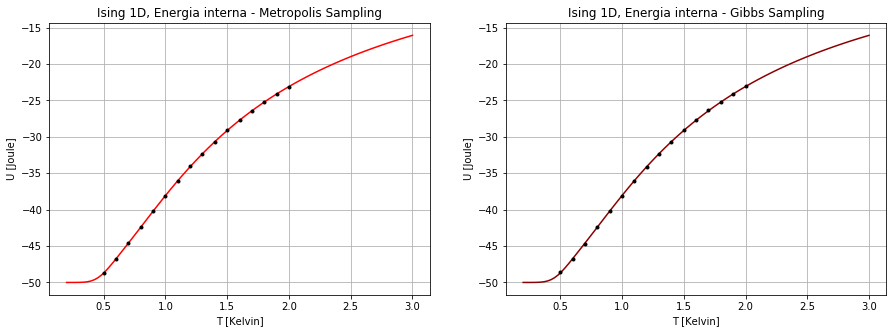

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

xm, ym, errorm = np.loadtxt("ex06.1/Metropolis/output.ene.0", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errorg = np.loadtxt("ex06.1/Gibbs/output.ene.0", usecols=(0,1,2), delimiter=' ', unpack='true')

points=100
T = np.linspace(0.2,3,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -Ns*J*( th + ch*thN )/( 1 + thN )
ax[0].errorbar(xm,ym,yerr=errorm, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 3., color = 'black')
ax[0].grid(True)
ax[0].plot(T, e, color = 'red')
ax[0].set_title('Ising 1D, Energia interna - Metropolis Sampling')
ax[0].set_xlabel('T [Kelvin]')
ax[0].set_ylabel('U [Joule]')
ax[1].errorbar(xg,yg,yerr=errorg, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 3., color = 'black')
ax[1].grid(True)
ax[1].plot(T, e, color = 'darkred')
ax[1].set_title('Ising 1D, Energia interna - Gibbs Sampling')
ax[1].set_xlabel('T [Kelvin]')
ax[1].set_ylabel('U [Joule]')
plt.show()

Commento: Se consideriamo il grafico energia interna al variare di T, si nota che l'energia interna si riduce. Ciò avviene perchè gli spin tendono sempre più ad allinearsi nello stesso verso fino a che alle basse temperature si ha una situazione in cui la maggioranza degli spin tende ad avere lo stesso verso e quindi l'energia interna tende al valore -100.
Sotto al valore della temperatura di $ T = 0,5 K$ il sistema è quasi bloccato in quanto il sistema accetta configurazioni contenenti disordine molto raramente, il tasso di accettazione dell'algoritmo Metropolis scende a 0,05 e quindi non facciamo simulazioni sotto a $T=0,5 K$.

Entrambi gli algoritmi di campionamento Metropolis e Gibbs sono efficienti a delineare la distribuzione di Boltzmann in quanto nel grafico non si osserva alcuna differenza di campionamento apprezzabile per quel che riguarda l'energia interna del sistema. La simulazione riportata sopra, riproduce il valore di aspettazione dell'energia interna, grandezza termodinamica del sistema presa qui in considerazione.
Le barre di errore non si riescono a visualizzare in quanto sono troppo piccole in rapporto alla scala su cui vengono riportati i valori delle y. Ad ogni modo i nostri valori sono compatibili con quelli attesi entro 2/3 delle barre d'errore per ogni punto.

### Capacità termica $C_V(N,T)$
#### ( con h=0)

Calcoliamo la capacità termica differenziando l'energia interna:
$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
C(N,T) = N\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B N(\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

Ciò che otteniamo è una forma del Teorema di fluttuazione/dissipazione: abbiamo associato la capacità termica, espressa come variazione dell'energia in funzione della temperatura (il sistema può assorbire o cedere energia variando la temperatura), alle fluttuazioni quadratiche dell'energia.
    
Calcolermo la capacità termica attraverso una stima Monte Carlo delle fluttuazioni quadratiche dell'energia.
In questo caso però possiamo calcolarcela anche analiticamente ( vedi ultima espressione scritta sopra per il calore specifico)

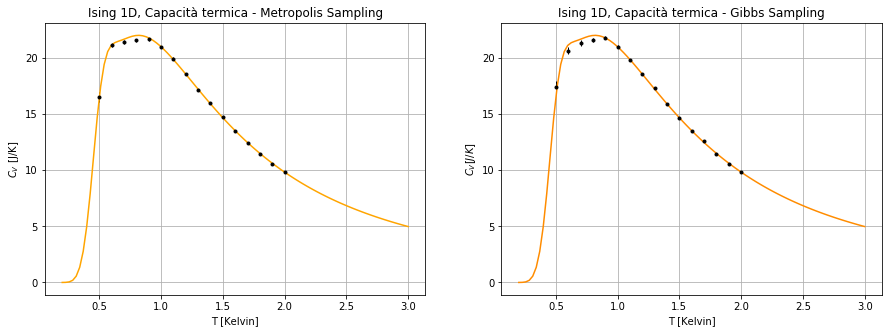

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

xm, ym, errorm = np.loadtxt("ex06.1/Metropolis/output.heatcap.0", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errorg = np.loadtxt("ex06.1/Gibbs/output.heatcap.0", usecols=(0,1,2), delimiter=' ', unpack='true')

points=100
T = np.linspace(0.2,3,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
heat=Ns*((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
ax[0].errorbar(xm,ym,yerr=errorm, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 1., color = 'black')
ax[0].grid(True)
ax[0].plot(T, heat, color = 'orange')
ax[0].set_title('Ising 1D, Capacità termica - Metropolis Sampling')
ax[0].set_xlabel('T [Kelvin]')
ax[0].set_ylabel('$C_V$ [J/K]')
ax[1].errorbar(xg,yg,yerr=errorg, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 1., color = 'black')
ax[1].grid(True)
ax[1].plot(T, heat, color = 'darkorange')
ax[1].set_title('Ising 1D, Capacità termica - Gibbs Sampling')
ax[1].set_xlabel('T [Kelvin]')
ax[1].set_ylabel('$C_V [J/K] $')
plt.show()

Dai grafici, sopra si nota che la Capacità termica tende ad avere un massimo locale in corrispondenza di valori di temperatura 0.5 K <T<1.0 K.

Partendo da temperature più alte e scendendo, il massimo locale si ha in corrispondenza di zone in cui il sistema cerca di formare un certo ordine nella configurazione degli spin, se invece procediamo dal basso verso l'alto si ha dove il sistema inizia a distruggere l'ordine che si sta instaurando a basse temperature. In 1D non è possibile rompere una simmetria dell'Hamiltoniana, quella degli spin  a temperatura finita anche per una simmetria discreta del modello di Ising.
La vera transizione di fase si ha a T=0 in quanto a questa temperatura il sistema deve assumere la configurazione di stato fondamentale, ossia quella a più bassa energia che corrisponde agli spin ordinati.

I risultati ottenuti nei grafici precedenti sono compatibili con il grafico ottenuto per il valore di aspettazione della capacità termica per grado di libertà riportato nell' LSN_Exercise_06 jupyter-notebook.


### Suscettività magnetica $\chi(N,T)$
#### ( con h=0 )
La suscettività magnetica misura come cambia la magnetizzazione del sistema se variamo il campo esterno.

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

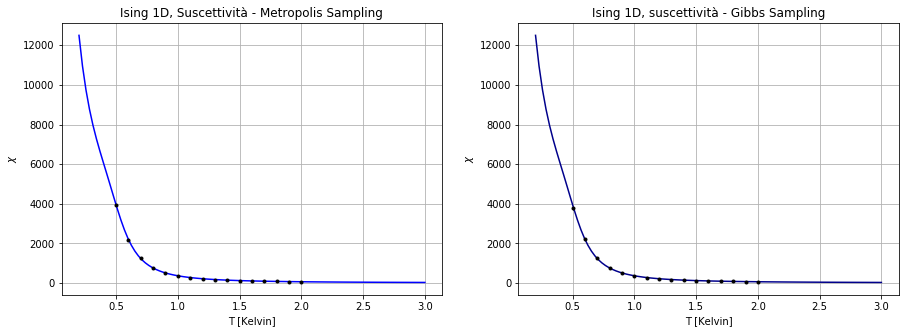

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

xm, ym, errorm = np.loadtxt("ex06.1/Metropolis/output.susceptibility.0", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errorg = np.loadtxt("ex06.1/Gibbs/output.susceptibility.0", usecols=(0,1,2), delimiter=' ', unpack='true')

points=100
T = np.linspace(0.2,3,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
X = Ns*beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
ax[0].errorbar(xm,ym,yerr=errorm, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 1., color = 'black')
ax[0].grid(True)
ax[0].plot(T, X, color = 'blue')
ax[0].set_title('Ising 1D, Suscettività - Metropolis Sampling')
ax[0].set_xlabel('T [Kelvin]')
ax[0].set_ylabel('$\chi$')
ax[1].errorbar(xg,yg,yerr=errorg, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 1., color = 'black')
ax[1].grid(True)
ax[1].plot(T, X, color = 'darkblue')
ax[1].set_title('Ising 1D, suscettività - Gibbs Sampling')
ax[1].set_xlabel('T [Kelvin]')
ax[1].set_ylabel('$\chi$')

plt.show()

Dai grafici riportati sopra, si osserva che la suscettività magnetica assume valori molto piccoli ( prossimi allo zero) a temperature alte, mentre a temperature basse assume valori molto alti.
In conclusione possiamo dire che valori ottenuti seguono i valori di aspettazione per la suscettività magnetica.

### Magnetizzazione $M(N,T)$
#### (con h=0.02)
$$
Se $h=0$, la magnetizzazione assume valore: $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ a qualsiasi temperatura finita perché in 1D, in assenza di campo magnetico esterno, non possiamo avere una transizione di fase (ferromagnetica).
$$M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$
La magnetizzazione M, quindi si può esperimere come valor medio della somma degli spin, valore che confronteremo con la formula analitica per la magnetizzazione espressa nella riga sottostante.
La formula esatta (con $h\ne0$, ossia con campo magnetico esterno finito) partendo da:
    
$M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ è:   
    
$$\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

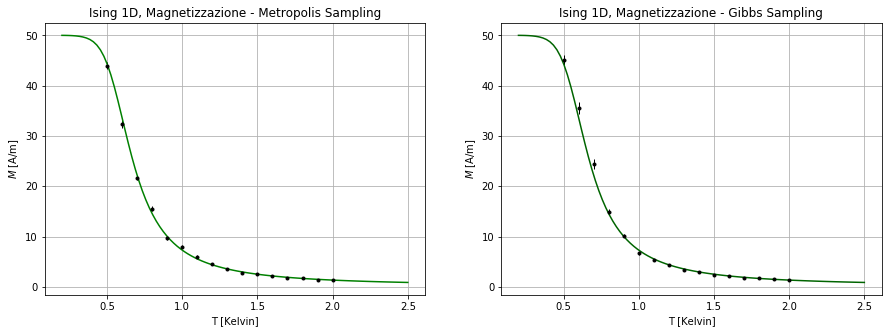

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

xm, ym, errorm = np.loadtxt("ex06.1/Metropolis/output.magnetization.0", usecols=(0,1,2), delimiter=' ', unpack='true')
xg, yg, errorg = np.loadtxt("ex06.1/Gibbs/output.magnetization.0", usecols=(0,1,2), delimiter=' ', unpack='true')
#campo esterno (h=0.02)
points=100
T = np.linspace(0.2,2.5,num=points)
b = 1/T
J = 1.0
h=0.02
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
M = M*Ns
ax[0].errorbar(xm,ym,yerr=errorm, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 1., color = 'black')
ax[0].grid(True)
ax[0].plot(T, M, color = 'green')
ax[0].set_title('Ising 1D, Magnetizzazione - Metropolis Sampling')
ax[0].set_xlabel('T [Kelvin]')
ax[0].set_ylabel('$M$ [A/m]')
ax[1].errorbar(xg,yg,yerr=errorg, linewidth = 0., marker = '.', ecolor = 'black', elinewidth = 1., color = 'black')
ax[1].grid(True)
ax[1].plot(T, M, color = 'darkgreen')
ax[1].set_title('Ising 1D, Magnetizzazione - Gibbs Sampling')
ax[1].set_xlabel('T [Kelvin]')
ax[1].set_ylabel('$M$ [A/m]')
plt.show()

I punti neri riportati nei grafici rappresentano il valore medio da $N_{blocchi}\times N_{stepperblocco}= 20\times 10^4=2\times 10^5$ per l'algoritmo Metropolis o Gibbs. 

Per ogni grandezza termodinamica del sistema la simulazione riproduce il valore di aspettazione.